In [1]:
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
val_images = train_images[55000:]
train_images = train_images[0:55000]

val_labels = train_labels[55000:]
train_labels = train_labels[0:55000]

### validation data / train data 구분

In [4]:
len(train_images)

55000

In [5]:
len(val_images)

5000

In [6]:
train_images = train_images.reshape((55000, 28 * 28))
train_images = train_images.astype('float32') / 255

val_images = val_images.reshape((5000, 28 * 28))
val_images = val_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

### ◆ learning rate = 0.01

In [8]:
network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
network.compile(optimizer=optimizers.RMSprop(lr=0.01), 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
history = network.fit(train_images,
                    train_labels,
                    epochs=15,
                    batch_size=64,
                    validation_data=(val_images, val_labels)) 

Instructions for updating:
Use tf.cast instead.
Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 8s 139us/step - loss: 14.4339 - accuracy: 0.1035 - val_loss: 14.3032 - val_accuracy: 0.1126
Epoch 2/15
55000/55000 [==============================] - 7s 131us/step - loss: 14.4471 - accuracy: 0.1037 - val_loss: 14.3032 - val_accuracy: 0.1126
Epoch 3/15
55000/55000 [==============================] - 7s 129us/step - loss: 14.4471 - accuracy: 0.1037 - val_loss: 14.3032 - val_accuracy: 0.1126
Epoch 4/15
55000/55000 [==============================] - 7s 131us/step - loss: 14.4471 - accuracy: 0.1037 - val_loss: 14.3032 - val_accuracy: 0.1126
Epoch 5/15
55000/55000 [==============================] - 7s 132us/step - loss: 14.4471 - accuracy: 0.1037 - val_loss: 14.3032 - val_accuracy: 0.1126
Epoch 6/15
55000/55000 [==============================] - 7s 130us/step - loss: 14.4471 - accuracy: 0.1037 - val_loss: 14.3032 - val_accuracy: 0.1126
Epo

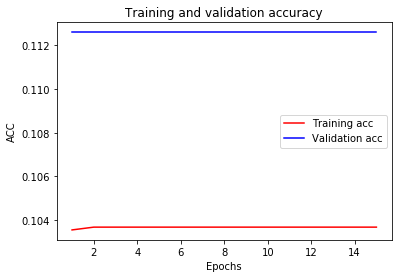

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

In [12]:
results = network.evaluate(test_images, test_labels)
results 

10000/10000 [==============================] - 1s 89us/step


[14.461155044555664, 0.10279999673366547]

### ◆ learning rate= 0.1

In [13]:
network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [14]:
network.compile(optimizer=optimizers.RMSprop(lr=0.1), 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
history = network.fit(train_images,
                    train_labels,
                    epochs=15,
                    batch_size=64,
                    validation_data=(val_images, val_labels)) 

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 8s 139us/step - loss: 14.5031 - accuracy: 0.0993 - val_loss: 14.5289 - val_accuracy: 0.0986
Epoch 2/15
55000/55000 [==============================] - 7s 133us/step - loss: 14.5165 - accuracy: 0.0994 - val_loss: 14.5289 - val_accuracy: 0.0986
Epoch 3/15
55000/55000 [==============================] - 7s 132us/step - loss: 14.5165 - accuracy: 0.0994 - val_loss: 14.5289 - val_accuracy: 0.0986
Epoch 4/15
55000/55000 [==============================] - 7s 134us/step - loss: 14.5165 - accuracy: 0.0994 - val_loss: 14.5289 - val_accuracy: 0.0986
Epoch 5/15
55000/55000 [==============================] - 7s 132us/step - loss: 14.5165 - accuracy: 0.0994 - val_loss: 14.5289 - val_accuracy: 0.0986
Epoch 6/15
55000/55000 [==============================] - 7s 132us/step - loss: 14.5165 - accuracy: 0.0994 - val_loss: 14.5289 - val_accuracy: 0.0986
Epoch 7/15
55000/55000 [===========================

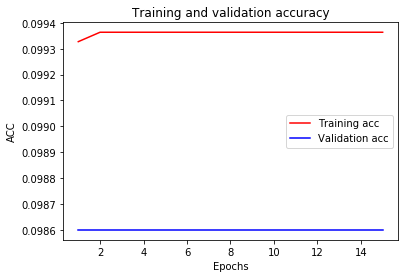

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

In [18]:
results = network.evaluate(test_images, test_labels)
results 

10000/10000 [==============================] - 1s 79us/step


[14.454707752990723, 0.1032]

### learning rate 별 비교
- learning rate=0.001 일때 test 정확도: 97.6%
- learning rate=0.01 일때 test 정확도: 10.2%
- learning rate=0.1 일때 test 정확도: 10.3%

- 이를 통해 learning rate 이 너무 크면 제대로 보고 넘어가지 못하는 경우가 생겨 학습이 제대로 이루어 지지 않는 것을 볼 수 있다. 즉, 0.001 일때와 0.01,0.1 인 경우에 정확도가 확연하게 차이가 난다. 해당 모델에서는 learning rate 이 0.001 일 경우 정확도가 가장 높다. 